# Comparing results
- So far i have tried 5 different Machine Learning algorithms on the datasets:
    - Kernel SVM: Training experiment 1
    - Naive Bayes: Training experiment 2
    - Gradient Boosting: Training experiment 3
    - Decision Tree: Training experiment 4
    - Random Forest: Training experiment 5
- This notebooks will compare and contrast 5 the perfomance of these algorithms

In [11]:
experiment_mapping = {
    "training_experiment_1" : "SVM",
    "training_experiment_2" : "Naive Bayes",
    "training_experiment_3" : "Gradient Boosting",
    "training_experiment_4" : "Decision Tree",
    "training_experiment_5" : "Random Forest"
}

# Load data from feature file

In [29]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from configs.config import MODEL_DIR, FEATURE_DIR
from sklearn.metrics import classification_report
from train.predict import *

In [ ]:
test_df = pd.read_hdf(str(FEATURE_DIR / 'feature_engineering_2.h5'), 'test')

In [7]:
X_test, y_test = test_df.drop(columns=["loan_status"]).iloc[:, :].values, test_df["loan_status"].iloc[:].values 

In [36]:
scores = {}

for d in os.listdir(MODEL_DIR):
    y_pred = load_and_predict_onnx(str(MODEL_DIR / d), X_test)
    scores[experiment_mapping[f"{d.split('.')[0]}"]] = classification_report(y_test, y_pred, output_dict=True)["weighted avg"]

# Visualize weighted average results

In [39]:
scores_df = pd.DataFrame(scores).T.drop(columns=["support"])

In [40]:
scores_df

,precision,recall,f1-score
SVM,0.872976,0.873111,0.873043
Decision Tree,0.898007,0.898222,0.898113
Random Forest,0.879190,0.817556,0.830723
Naive Bayes,0.877012,0.755111,0.775680
Gradient Boosting,0.919815,0.921556,0.919355


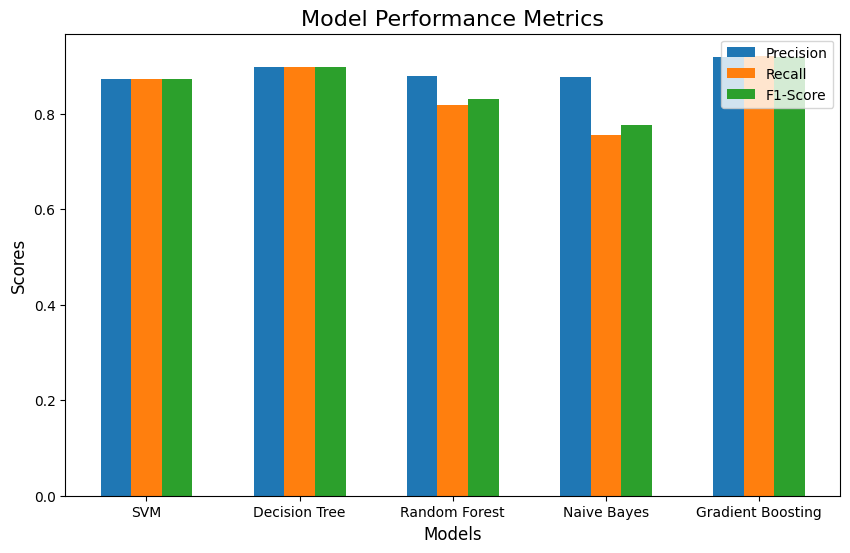

In [45]:
bar_width = 0.2
index = np.arange(len(scores_df))  # Model index positions
models = scores.keys()

# Creating the plot
plt.figure(figsize=(10, 6))

# Plotting the bars for each metric
plt.bar(index - bar_width, scores_df['precision'], bar_width, label='Precision')
plt.bar(index, scores_df['recall'], bar_width, label='Recall')
plt.bar(index + bar_width, scores_df['f1-score'], bar_width, label='F1-Score')

# Adding labels and title
plt.xlabel('Models', fontsize=12)
plt.ylabel('Scores', fontsize=12)
plt.title('Model Performance Metrics', fontsize=16)
plt.xticks(index, models)  # Setting the x-axis ticks to model names
plt.legend()

# Display the plot
plt.show()